# 1. 복습하기

* ( 앙상블 학습 )을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합하여 보다 정확한 최종 예측을 도출하는 기법입니다.

* ( 랜덤 포레스트 )는 결정 트리의 쉽고 직관적인 분류기준을 갖는다는 장점은 유지하면서 과대적합에 빠지기 쉬운 단점을 보완하는 배깅의 대표적인 알고리즘입니다.

* 랜덤 포레스트 알고리즘을 분류에 적용할 때 사용하는 클래스는? ( RandomForestClassifier )

* ( 혼동 행렬 ) : 지도 학습으로 훈련된 분류 알고리즘의 성능을 시각화 할 수있는 표

* ( 정확도 ) = 예측값과 실제값이 동일한 건수 / 전체 데이터건수

* ( 정밀도 ) = 예측을 Positive로 한 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율

* ( 재현율 ) = 실제값이 Positive인 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율

* ( F1 스코어 )는 정밀도와 재현율을 결합한 지표로 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 높은 값을 가집니다.

# 2. 피처 스케일링 (Feature scaling)

* A는 거리를 나타내는 특성으로 0 ~ 100사이 스케일을 가지고 있고, B는 금액을 나타내는 특성으로 0 ~ 100,000,000사이 스케일을 가지고 있다고 해봅시다.

* 이러한 데이터셋으로 학습을 시킨다면 어떻게 될까요?

* ( 스케일링 ) : 서로 다른 변수의 값의 범위를 일정한 수준으로 맞추는 작업으로 ( 정규화(Normalization) )와 ( 표준화(Standardization) )가 있습니다.

## 2-1. 정규화

* ( 정규화 ) : 최소 ~ 최대 범위로 스케일 변환을 하는 것으로 대부분의 정규화는 0 ~ 1 범위에 맞추는 것을 의미합니다.

* 최소 ~ 최대 스케일 변환을 통한 정규화는 정해진 범위의 값이 필요할 때 유용하게 사용할 수 있습니다.

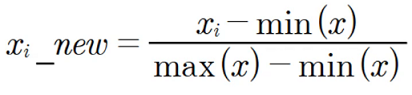

## 2-2. 표준화

* ( 표준화 ) : 특성의 평균을 0에 맞추고 분산을 1로 만들어 정규 분포와 같은 특징을 가지도록 합니다.

* 로지스틱 회귀와 SVM와 같은 여러 선형 모델은 가중치를 0 또는 0에 가까운 작은 난수로 초기화하는데, 표준화를 사용하면 이러한 가중치를 더 쉽게 학습할 수 있도록 만듭니다.

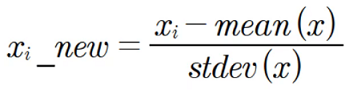

In [16]:
# 정규화, 표준화 계산하기
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5])

# normalize / standardize
print('정규화:', (x - x.min()) / (x.max() - x.min()))
print('표준화:', (x-x.mean())/x.std())

정규화: [0.  0.2 0.4 0.6 0.8 1. ]
표준화: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [17]:
# 표준화된 데이터의 평균과 분산 확인하기
a = (x-x.mean())/x.std()
a.mean(), a.var()

(-3.700743415417188e-17, 1.0)

In [23]:
# 정규화, 표준화 Scaler 사용하기
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data = x.reshape(-1, 1)

ms = MinMaxScaler()
ms.fit(data)
scaled_data = ms.transform(data)
# scaled_data = ms.fit_transform(data)
print(scaled_data)

ss = StandardScaler()
ss.fit(data)
scaled_data2 = ss.transform(data)
print(scaled_data2)

[[0. ]
 [0.2]
 [0.4]
 [0.6]
 [0.8]
 [1. ]]
[[-1.46385011]
 [-0.87831007]
 [-0.29277002]
 [ 0.29277002]
 [ 0.87831007]
 [ 1.46385011]]


In [21]:
# 표준화로 스케일링된 데이터의 평균과 분산 확인하기
scaled_data2.mean(axis=0), scaled_data2.var(axis=0)

(array([-3.70074342e-17]), array([1.]))

## 2-3. 피처 스케일링 시 주의사항

* Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 수행하면 테스트 데이터 세트로는 **다시 fit()을 수행하지 않고** 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform()을 수행해야 합니다.

* 또는 전체 데이터의 스케일링 변환을 먼저 한 뒤 학습 데이터와 테스트 데이터로 분리하는 방법도 있습니다.

In [5]:
import numpy as np

train_data = np.arange(0, 11).reshape(-1, 1)
test_data = np.arange(0, 6).reshape(-1, 1)

print(train_data)
print(test_data)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [24]:
# MinMaxScaler로 학습 데이터를 피처 스케일링하기
# 1/10로 스케일링됨
scaler = MinMaxScaler()
scaler.fit(train_data)
scaler.transform(train_data)

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ]])

In [26]:
# MinMaxScaler로 테스트 데이터를 피처 스케일링하기
# 1/5로 스케일링됨
# scaler.fit(test_data)
scaler.transform(test_data)

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5]])

* Q. 지금까지 학습한 결정트리와 랜덤 포레스트는 피처 스케일링이 필요할까요?

# 3. 로지스틱 회귀 (Logistic Regression)

* ( 로지스틱 회귀 )는 **선형 회귀** 방식을 기반으로 데이터가 어떤 범주에 속할 확률을 0에서 1사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 알고리즘입니다. [위키백과](https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80)

예) 스팸 메일 분류 : 스팸일 확률이 0.5 이상이면 스팸 메일(spam, 1)로 분류하고, 확률이 0.5보다 작은 경우면 정상 메일(ham, 0)으로 분류

## 3-1. 선형 회귀 (Linear Regression)

* ( 선형 회귀 ) : 실제값과 예측값의 차이를 최소화하는 선형 함수의 회귀 최적선을 찾는 회귀분석 기법입니다. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

* (   )는 y값이 연속형 데이터, (   )는 y값이 범주형 데이터 (0 또는 1)

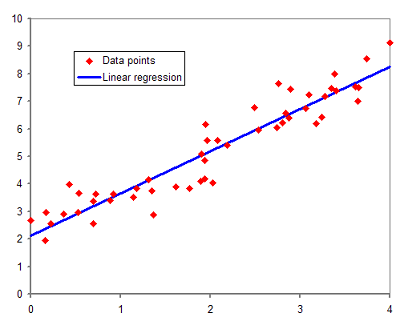

* Q. 선형 회귀로 0 또는 1로 분류를 할 수는 없을까요?

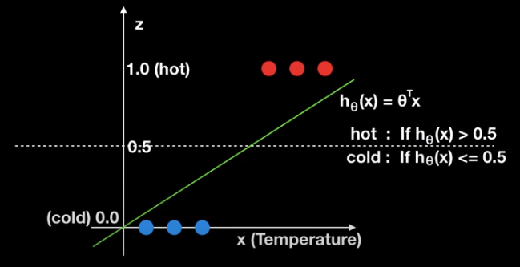

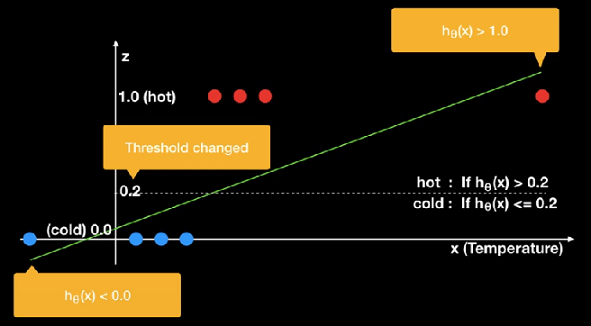

## 3-2. 시그모이드 함수 (Sigmoid)

* 로지스틱 회귀는 선형 회귀 방식을 기반으로 하되 ( 시그모이드 ) 함수를 이용해 분류를 수행하는 알고리즘입니다.

  * x값이 아무리 커지거나 작아져도 y값은 항상 0과 1사이 값을 반환함
  * x값이 커지면 1에 근사하며 x값이 작아지면 0에 근사함
  * x가 0일 때는 0.5임
  * [desmos에서 그래프 그려보기](https://www.desmos.com/)


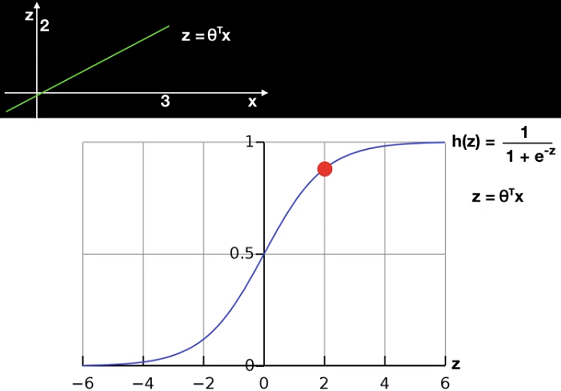

## 3-3. 로지스틱 회귀 실습

In [1]:
# 데이터셋 가져오기
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 피처 스케일링 하기
scaler = StandardScaler()
scaler.fit_transform(cancer.data)

# 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(scaled_data, cancer.target, test_size=0.2, random_state=11)

In [20]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 객체 생성
lr = LogisticRegression(solver='liblinear')

# 로지스틱 회귀로 학습하기
lr.fit(X_train, y_train)

# 예측하기
pred = lr.predict(X_test)
pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0])

In [7]:
# 확률 보기
import numpy as np
np.set_printoptions(precision=3, suppress=True)
lr.predict_proba(X_test[:10])

array([[1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.002, 0.998],
       [0.649, 0.351],
       [0.002, 0.998],
       [0.   , 1.   ],
       [0.002, 0.998]])

In [8]:
# 정답 레이블 보기
y_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0])

In [9]:
# 정확도 보기
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9824561403508771

In [12]:
# 로지스틱 회귀에서 학습한 계수 보기 (가중치, 절편)
# y = W1X1 + W2X2 + ... + WnXn + b
# y = -0.367*X1 -0.458*X2 + ... -0.569*X30 + 0.265
lr.coef_, lr.intercept_

(array([[-0.367, -0.458, -0.37 , -0.451,  0.08 ,  0.62 , -0.878, -0.985,
         -0.059,  0.4  , -1.169,  0.331, -0.796, -0.876, -0.312,  0.57 ,
          0.164, -0.249,  0.383,  0.479, -0.865, -1.238, -0.79 , -0.842,
         -0.769,  0.049, -0.695, -0.74 , -0.811, -0.569]]),
 array([0.265]))

## 3-4. 하이퍼 파라미터 튜닝하기

* penalty : 규제(Regularization)의 유형 설정, L1 규제 / L2 규제(디폴트 값)
  * 규제 : 과대적합을 해결하기 위해 과도한 파라미터(가중치)값이 커지지 않도록 제한하는 기법으로 가중치를 규제하면 모델의 일반화 성능이 올라간다. 

* C : 규제 강도를 조절, C값이 작을 수록 규제 강도가 커짐, 1(디폴트 값)

In [21]:
# 그리드 서치로 최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
  'penalty': ['l1', 'l2'],
  'C': [0.01, 0.1, 1, 5, 10]
}

gs = GridSearchCV(lr, param_grid=params, n_jobs=-1)
gs.fit(scaled_data, cancer.target)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [22]:
gs.cv_results_

{'mean_fit_time': array([0.004, 0.012, 0.012, 0.011, 0.008, 0.006, 0.015, 0.01 , 0.022,
        0.008]),
 'std_fit_time': array([0.001, 0.007, 0.008, 0.006, 0.001, 0.001, 0.005, 0.002, 0.007,
        0.003]),
 'mean_score_time': array([0.001, 0.002, 0.002, 0.001, 0.002, 0.001, 0.001, 0.001, 0.   ,
        0.001]),
 'std_score_time': array([0.   , 0.002, 0.003, 0.   , 0.001, 0.001, 0.   , 0.   , 0.   ,
        0.001]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 5, 5, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1',
                    'l2'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01, 'penalty': 'l1'},
  {'C': 0.01, 'pen

In [23]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [26]:
gs.best_score_

0.982425089271852

In [27]:
lr2=gs.best_estimator_
lr2.score(X_test, y_test)

0.9824561403508771